In [1]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
import numpy as np
import zeus
print('zeus version:', zeus.__version__)

zeus version: 0.9.9


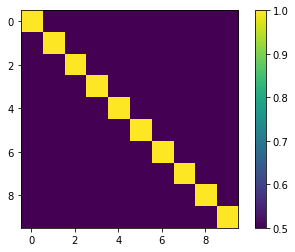

In [13]:
ndim = 10
nwalkers = 2 * ndim * 1
nsteps= 1000

#C = make_spd_matrix(ndim)
C = np.identity(ndim)
C[C==0] = 0.50
plt.imshow(C)
plt.colorbar()

icov = np.linalg.inv(C)

#mu = np.random.rand(ndim) * 10.0
mu  = np.zeros(ndim)

def logp(x, mu, icov):
    return -0.5 * np.dot(np.dot((x-mu).T,icov),(x-mu))

#start = np.random.rand(ndim)
start = mu + 1.0 * np.random.randn(nwalkers,ndim)

In [ ]:
ndim = 16
nwalkers = 2 * ndim #* 2
nsteps= int(100000 / nwalkers)

def logp(x):
    a = 1.0
    b = 0.5
    first = -0.5*(x[0]**2.0 / a**2.0) - 0.5 * np.log(2.0 * np.pi) - np.log(a)
    rest = -0.5*np.sum(x[1:]**2.0 / np.exp(2*b*x[0])) -0.5*np.log(2.0 *np.pi) - (ndim-1) * b * x[0]
    return first + rest

start =np.random.randn(nwalkers,ndim)

In [ ]:
ndim = 2
nwalkers = 2*ndim*2
nsteps= 10000

def logp(x):
    return -100*(x[1]-x[0]**2.0)**2.0 - (1-x[0])**2.0

start = np.random.randn(nwalkers,ndim)

In [ ]:
def logp(x):
    return -np.sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1.0-x[:-1])**2.0)

In [ ]:
from multiprocessing import Pool

with Pool() as pool:
    sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov], pool=pool)
    sampler.run(start, nsteps)

In [14]:
#sampler = zeus.sampler(logp, nwalkers, ndim, jump=0.0)
sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov], proposal={'random' : 1.0})
sampler.run(start, nsteps)

Initialising ensemble of 20 walkers...
Sampling progress : 100%|██████████| 1000/1000 [00:01<00:00, 858.75it/s]


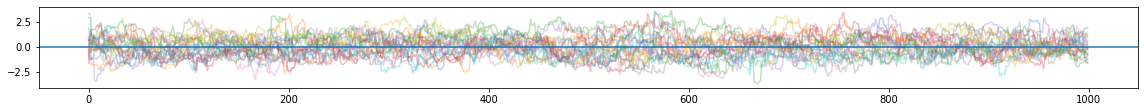

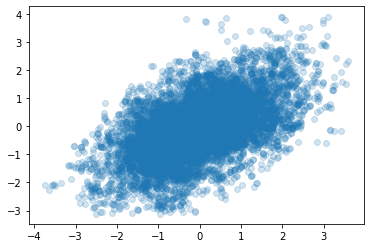

Summary
-------
Number of Generations: 1000
Number of Parameters: 10
Number of Walkers: 20
Number of Tuning Generations: 8
Scale Factor: 1.830964
Mean Integrated Autocorrelation Time: 29.97
Effective Sample Size: 667.4
Number of Log Probability Evaluations: 101775.0
Effective Samples per Log Probability Evaluation: 0.006558


MCMC mean: [-0.03241832 -0.04967162 -0.02227037 -0.01267358 -0.04383219 -0.07547362
 -0.03618597 -0.06954065 -0.02868719  0.01330433]
TRUE mean: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
MCMC std: [1.06216682 1.04532569 1.04599549 1.06042781 1.05022825 1.03826221
 1.03071334 0.99836108 0.99863321 1.04712504]
TRUE std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(1):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(nsteps),sampler.chain[:,:,n].T,alpha=0.3)
    plt.axhline(y=mu[n])
plt.tight_layout()
plt.show()

trace = sampler.flatten(burn=int(nsteps/2))
plt.scatter(trace[:,0],trace[:,1], alpha=0.2)
plt.show()

print('MCMC mean:', np.mean(trace, axis=0))
print('TRUE mean:', mu)
print('MCMC std:', np.std(trace, axis=0))
print('TRUE std:', np.sqrt(np.diag(C)))

sampler.summary

In [16]:
sampler.efficiency

0.006557625351878515

In [17]:
sampler.mu

1.83096444033091

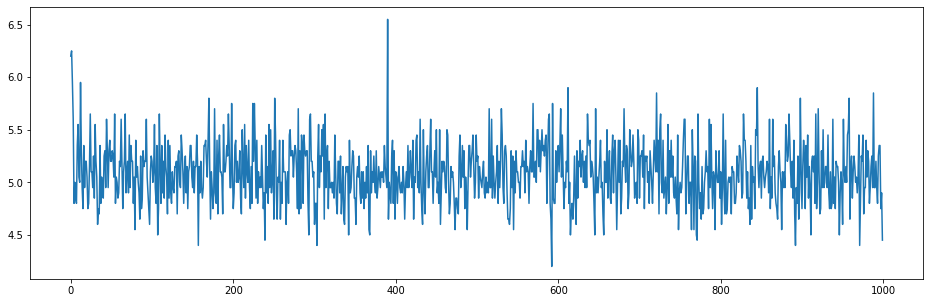

In [18]:
plt.figure(figsize=(16,5))
plt.plot(np.arange(nsteps),sampler.neval/nwalkers)
plt.show()

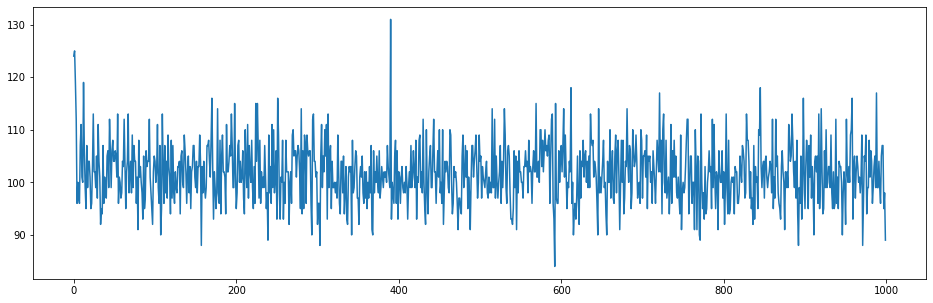

In [19]:
plt.figure(figsize=(16,5))
plt.plot(np.arange(nsteps),sampler.neval)
plt.show()

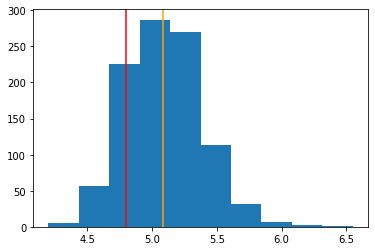

5.0856
4.799535951227702


In [20]:
mean_mu = np.mean(sampler.neval[int(nsteps/2):]/nwalkers)
std_mu = np.std(sampler.neval[int(nsteps/2):]/nwalkers)

plt.hist(sampler.neval/nwalkers)
plt.axvline(x=mean_mu, color='orange')
plt.axvline(x=mean_mu - std_mu, color='red')
plt.show()

print(mean_mu)
print(mean_mu - std_mu)

In [21]:
np.mean(sampler.neval[-10:]/nwalkers)

4.994999999999999

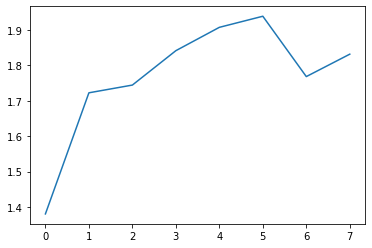

In [22]:
plt.plot(np.arange(len(sampler.mus)),sampler.mus)
plt.show()

In [23]:
sampler.scale_factor

array([1.38095238, 1.72212885, 1.74392795, 1.84081284, 1.90655615,
       1.93781117, 1.76782774, 1.83096444])